<a class="anchor" id="0"></a>
# **Random Forest Classifier Tutorial with Python**

https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial

Hello friends

Random Forest is a supervised machine learning algorithm which is based on ensemble learning. In this kernel, I build two Random Forest Classifier models to predict the safety of the car, one with 10 decision-trees and another one with 100 decision-trees. The expected accuracy increases with number of decision-trees in the model. I have demonstrated the **feature selection process** using the Random Forest model to find only the important features, rebuild the model using these features and see its effect on accuracy. 


**As always, I hope you find this kernel useful and your <font color="red"><b>UPVOTES</b></font> would be highly appreciated**.

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Random Forest algorithm](#1)
2.	[Random Forest algorithm intuition](#2)
3.	[Advantages and disadvantages of Random Forest algorithm](#3)
4.	[Feature selection with Random Forests](#4)
5.	[Difference between Random Forests and Decision-Trees](#5)
6.	[Relationship to nearest neighbours](#6)
7.	[Import libraries](#7)
8.	[Import dataset](#8)
9.	[Exploratory data analysis](#9)
10.	[Declare feature vector and target variable](#10)
11.	[Split data into separate training and test set](#11)
12.	[Feature engineering](#12)
13.	[Random Forest Classifier model with default parameters](#13)
14.	[Random Forest Classifier model with parameter n_estimators=100](#14)
15.	[Find important features with Random Forest model](#15)
16.	[Visualize the feature scores of the features](#16)
17.	[Build the Random Forest model on selected features](#17)
18.	[Confusion matrix](#18)
19.	[Classification report](#19)
20.	[Results and conclusion](#20)
21. [References](#21)

# **1. Introduction to Random Forest algorithm** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

Random Forest es un algoritmo de aprendizaje supervisado. Tiene dos variaciones: una se usa para problemas de clasificación y la otra se usa para problemas de regresión. Es uno de los algoritmos más flexibles y fáciles de usar. Crea árboles de decisión en las muestras de datos dadas, obtiene predicciones de cada árbol y selecciona la mejor solución mediante votación. También es un buen indicador de la importancia de las características.


Algoritmo Random forest combina múltiples árboles de decisión, lo que da como resultado un bosque de árboles, de ahí el nombre `Random Forest`. En el clasificador de bosque aleatorio, cuanto mayor sea el número de árboles en el bosque, mayor será la precisión (accuracy).



# **2. Random Forest algorithm intuition** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


La intuición del algoritmo Random forest se puede dividir en dos etapas.

En la primera etapa, seleccionamos aleatoriamente `k` características del total de `m` características y construimos el bosque aleatorio. En la primera etapa, procedemos de la siguiente manera:-

1. Seleccione aleatoriamente las funciones `k` de un total de `m` funciones donde `k < m`.
2. Entre las características `k`, calcule el nodo `d` utilizando el mejor punto de división.
3. Divida el nodo en nodos secundarios usando la mejor división.
4. Repita de 1 a 3 pasos hasta alcanzar el número de nodos `l`.
5. Construya el bosque repitiendo los pasos 1 a 4 por `n` veces para crear `n` número de árboles.


En la segunda etapa, hacemos predicciones utilizando el algoritmo de bosque aleatorio entrenado.

1. Tomamos las características de la prueba y usamos las reglas de cada árbol de decisión creado aleatoriamente para predecir el resultado y almacenar el resultado previsto.
2. Luego, calculamos los votos para cada objetivo previsto.
3. Finalmente, consideramos el objetivo pronosticado más votado como la predicción final del algoritmo de bosque aleatorio.


### Random Forest algorithm intuition (randon_forest_classifier)
![Random Forest](https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg)

# **3. Advantages and disadvantages of Random Forest algorithm** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


Las ventajas del algoritmo de bosque aleatorio son las siguientes: -


1. El algoritmo de bosque aleatorio se puede utilizar para resolver problemas de clasificación y regresión.
2. Se considera un modelo muy preciso y robusto porque utiliza una gran cantidad de árboles de decisión para hacer predicciones.
3. Los bosques aleatorios toman el promedio de todas las predicciones realizadas por los árboles de decisión, lo que cancela los sesgos. Por lo tanto, no sufre el problema de **sobreajuste**.
4. El clasificador de bosque aleatorio puede manejar los valores faltantes. Hay dos formas de manejar los valores perdidos. El primero es usar valores medianos para reemplazar variables continuas y el segundo es calcular el promedio ponderado por proximidad de los valores faltantes.
5. El clasificador de bosque aleatorio se puede utilizar para la selección de características. Significa seleccionar las características más importantes de las características disponibles del conjunto de datos de entrenamiento.


Las desventajas del algoritmo Random Forest se enumeran a continuación: -


1. La mayor desventaja de los bosques aleatorios es su complejidad computacional. Los bosques aleatorios son muy lentos para hacer predicciones porque se usa una gran cantidad de árboles de decisión para hacer predicciones. Todos los árboles en el bosque tienen que hacer una predicción para la misma entrada y luego votarla. Por lo tanto, es un proceso que requiere mucho tiempo.
2. El modelo es difícil de interpretar en comparación con un árbol de decisión, donde podemos hacer una predicción fácilmente en comparación con un árbol de decisión.


# **4. Feature selection with Random Forests** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)


El algoritmo de bosques aleatorios se puede utilizar para el proceso de selección de características. Este algoritmo se puede utilizar para clasificar la importancia de las variables en un problema de regresión o clasificación.

Medimos la importancia de las variables en un conjunto de datos ajustando el algoritmo de bosques aleatorios a los datos. Durante el proceso de ajuste, se registra y promedia el error fuera de la bolsa (out of bag = datos test) para cada punto de datos sobre el bosque.

La importancia de la j-ésima característica se midió después del entrenamiento. Los valores de la j-ésima característica se permutaron entre los datos de entrenamiento y el error fuera de la bolsa se volvió a calcular en este conjunto de datos perturbado. El puntaje de importancia para la j-ésima característica se calcula promediando la diferencia en el error fuera de la bolsa antes y después de la permutación sobre todos los árboles. El puntaje se normaliza por la desviación estándar de estas diferencias.

Las características que producen valores grandes para este puntaje se clasifican como más importantes que las características que producen valores pequeños. Basándonos en este puntaje, elegiremos las características más importantes y descartaremos las menos importantes para la construcción del modelo.

# **5. Difference between Random Forests and Decision Trees** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


Compararé bosques aleatorios con árboles de decisión. Algunas características sobresalientes de la comparación son las siguientes:

1. Los bosques aleatorios son un conjunto de múltiples árboles de decisión.

2. Los árboles de decisión son computacionalmente más rápidos en comparación con los bosques aleatorios.

3. Los árboles de decisión profundos pueden sufrir de sobreajuste. El bosque aleatorio evita el sobreajuste al crear árboles en bosques aleatorios.

4. El bosque aleatorio es difícil de interpretar. Pero, un árbol de decisión es fácilmente interpretable y puede convertirse en reglas.

# **6. Relationship to nearest neighbours** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)


Lin y Jeon señalaron en 2002 una relación entre los bosques aleatorios y el algoritmo de k vecinos más cercanos. Resulta que ambos pueden verse como los llamados esquemas de vecindarios ponderados. Estos son modelos construidos a partir de un conjunto de entrenamiento que hacen predicciones para nuevos puntos observando la vecindad del punto, formalizados por una función de peso.

# **7. Import libraries** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


In [2]:
import warnings

warnings.filterwarnings('ignore')

# **8. Import dataset** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [4]:
df = pd.read_csv("H:\FIUBA 2013\ORGANICION DE DATOS\Machine Learning - Organizacion de datos\Datasets\car_evaluation.csv")

# **9. Exploratory data analysis** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


Ahora, exploraré los datos para obtener información sobre los datos.

In [4]:
# view dimensions of dataset

df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

### View top 5 rows of dataset

In [5]:
# preview the dataset

df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   


buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Explore `class` variable

In [10]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [21]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

# **10. Declare feature vector and target variable** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [12]:
X = df.drop(['class'], axis=1)

y = df['class']

# **11. Split data into separate training and test set** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

In [13]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [14]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

# **12. Feature Engineering** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will check the data types of variables again.

In [15]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode categorical variables


Now, I will encode the categorical variables.

In [22]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


We can see that all  the variables are ordinal categorical data type.

In [23]:
# import category encoders

import category_encoders as ce

In [24]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [25]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [26]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


We now have training and test set ready for model building. 

# **13. Random Forest Classifier model with default parameters** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [42]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=10, random_state=0)    # Recordar que random_state es para que siempre me de el mismo resultado, comumente se usa 42.



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9316


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of `n_estimators = 10`. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

# **14. Random Forest Classifier model with parameter n_estimators=100** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

In [44]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9263


The model accuracy score with 10 decision-trees is 0.9247 but the same with 100 decision-trees is 0.9457. So, as expected accuracy increases with number of decision-trees in the model.

# **15. Find important features with Random Forest model** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)


Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy. 


First, I will create the Random Forest model as follows:-

In [45]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [49]:
# view the feature scores
# Esto se conoce como feature importance o importancia de Gini.
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.306639
persons     0.238293
maint       0.165942
buying      0.163740
lug_boot    0.125386
dtype: float64

We can see that the most important feature is `safety` and least important feature is `doors`.

# **16. Visualize feature scores of the features** <a class="anchor" id="16"></a>

[Table of Contents](#0.1)


Now, I will visualize the feature scores with matplotlib and seaborn.

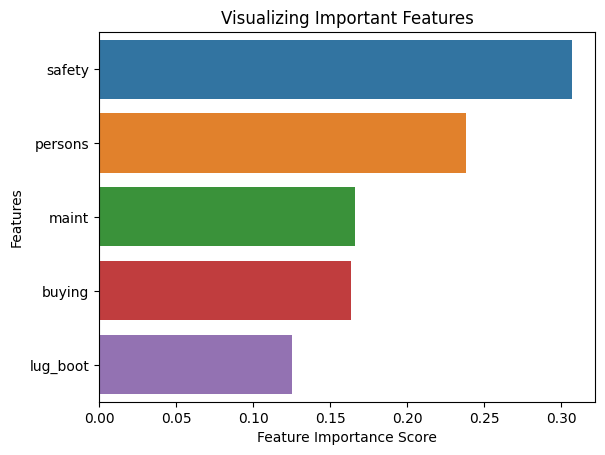

In [50]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

# **17. Build Random Forest model on selected features** <a class="anchor" id="17"></a>

[Table of Contents](#0.1)


Now, I will drop the least important feature `doors` from the model, rebuild the model and check its effect on accuracy.

In [32]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [33]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


Now, I will build the random forest model and check accuracy.

In [34]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [35]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with doors variable removed : 0.9263


I have removed the `doors` variable from the model, rebuild it and checked its accuracy. The accuracy of the model with `doors` variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with `doors` variable removed from the model.

Furthermore, the second least important model is `lug_boot`. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

# **18. Confusion matrix** <a class="anchor" id="18"></a>

[Table of Contents](#0.1)



A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [36]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[108   5  12   2]
 [  1  10   2   5]
 [ 10   0 389   0]
 [  4   1   0  21]]


# **19. Classification Report** <a class="anchor" id="19"></a>

[Table of Contents](#0.1)


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       127
        good       0.62      0.56      0.59        18
       unacc       0.97      0.97      0.97       399
       vgood       0.75      0.81      0.78        26

    accuracy                           0.93       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.93      0.93      0.93       570



# **20. Results and conclusion** <a class="anchor" id="20"></a>

[Table of Contents](#0.1)


1.	In this project, I build a Random Forest Classifier to predict the safety of the car. I build two models, one with 10 decision-trees and another one with 100 decision-trees. 
2.	The model accuracy score with 10 decision-trees is 0.9247 but the same with 100 decision-trees is 0.9457. So, as expected accuracy increases with number of decision-trees in the model.
3.	I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is `safety` and least important feature is `doors`.
4.	I have removed the `doors` variable from the model, rebuild it and checked its accuracy. The accuracy of the model with `doors` variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with `doors` variable removed from the model.
5.	The second least important model is `lug_boot`. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.
6.	Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.



# **21. References** <a class="anchor" id="21"></a>

[Table of Contents](#0.1)


The work done in this project is inspired from following books and websites:-

1. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

2. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

3. https://en.wikipedia.org/wiki/Random_forest

4. https://www.datacamp.com/community/tutorials/random-forests-classifier-python

5. http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/

6. https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

So, now we will come to the end of this kernel.

I hope you find this kernel useful and enjoyable.

Your comments and feedback are most welcome.

Thank you


[Go to Top](#0)